# Introduction

This notebook presents training of **MobileNet V2** from scratch on [Imagenette](https://github.com/fastai/imagenette) dataset from fast.ai.

# Imports

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt

Limit TensorFlow GPU memory usage

In [2]:
import tensorflow as tf
gpu_options = tf.GPUOptions(allow_growth=True)  # init TF ...
config=tf.ConfigProto(gpu_options=gpu_options)  # w/o taking ...
with tf.Session(config=config): pass            # all GPU memory

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Configuration

In [4]:
# dataset_location = '/home/marcin/Datasets/imagenette-160/'
# assert os.path.isdir(os.path.join(dataset_location, 'train'))
# assert os.path.isdir(os.path.join(dataset_location, 'val'))

In [5]:
dataset_location = '/home/marcin/Datasets/dogs-vs-cats-small'
assert os.path.isdir(os.path.join(dataset_location, 'train'))
assert os.path.isdir(os.path.join(dataset_location, 'validation'))

In [7]:
# from keras.preprocessing.image import ImageDataGenerator
# from keras.models import Sequential
# from keras.layers import Conv2D, MaxPooling2D
# from keras.layers import Activation, Dropout, Flatten, Dense

In [8]:
img_width, img_height = 150, 150
input_shape = (img_width, img_height, 3)

In [9]:
from tensorflow.keras.layers import Conv2D, MaxPool2D, Activation, Dropout, Flatten, Dense

model = tf.keras.models.Sequential()
model.add(Conv2D(32, (3, 3), input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
metrics=['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [10]:
batch_size = 16

In [11]:
# this is the augmentation configuration we will use for training
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

# this is the augmentation configuration we will use for testing:
# only rescaling
test_datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = train_datagen.flow_from_directory(
    directory=os.path.join(dataset_location, 'train'),
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
    directory=os.path.join(dataset_location, 'validation'),
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')


Found 2000 images belonging to 2 classes.
Found 800 images belonging to 2 classes.


In [12]:
nb_train_samples = 2000
nb_validation_samples = 800
epochs = 50

In [13]:
hist = model.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
validation_steps=nb_validation_samples // batch_size)

Instructions for updating:
Use tf.cast instead.
Epoch 1/50
125/125 [==============================] - 14s 116ms/step - loss: 0.7007 - acc: 0.5455 - val_loss: 0.6733 - val_acc: 0.5987
Epoch 2/50
125/125 [==============================] - 13s 108ms/step - loss: 0.6692 - acc: 0.5980 - val_loss: 0.6437 - val_acc: 0.6762
Epoch 3/50
125/125 [==============================] - 13s 107ms/step - loss: 0.6325 - acc: 0.6565 - val_loss: 0.6227 - val_acc: 0.6800
Epoch 4/50
125/125 [==============================] - 13s 107ms/step - loss: 0.6229 - acc: 0.6685 - val_loss: 0.6140 - val_acc: 0.6812
Epoch 5/50
125/125 [==============================] - 14s 108ms/step - loss: 0.5975 - acc: 0.6920 - val_loss: 0.5717 - val_acc: 0.6812
Epoch 6/50
125/125 [==============================] - 13s 107ms/step - loss: 0.5773 - acc: 0.7115 - val_loss: 0.5673 - val_acc: 0.7100
Epoch 7/50
125/125 [==============================] - 13s 107ms/step - loss: 0.5636 - acc: 0.7080 - val_loss: 1.0236 - val_acc: 0.6250
Epoch 8

125/125 [==============================] - 13s 108ms/step - loss: 0.3944 - acc: 0.8330 - val_loss: 0.4943 - val_acc: 0.8188
Epoch 38/50
125/125 [==============================] - 13s 107ms/step - loss: 0.3789 - acc: 0.8440 - val_loss: 0.6020 - val_acc: 0.7925
Epoch 39/50
125/125 [==============================] - 13s 106ms/step - loss: 0.3730 - acc: 0.8355 - val_loss: 0.5518 - val_acc: 0.7812
Epoch 40/50
125/125 [==============================] - 13s 107ms/step - loss: 0.3840 - acc: 0.8500 - val_loss: 0.5075 - val_acc: 0.7763
Epoch 41/50
125/125 [==============================] - 13s 107ms/step - loss: 0.3774 - acc: 0.8335 - val_loss: 0.4575 - val_acc: 0.7900
Epoch 42/50
125/125 [==============================] - 13s 106ms/step - loss: 0.3985 - acc: 0.8240 - val_loss: 0.5286 - val_acc: 0.7912
Epoch 43/50
125/125 [==============================] - 13s 107ms/step - loss: 0.3825 - acc: 0.8370 - val_loss: 0.5744 - val_acc: 0.8037
Epoch 44/50
125/125 [==============================] - 13s 1

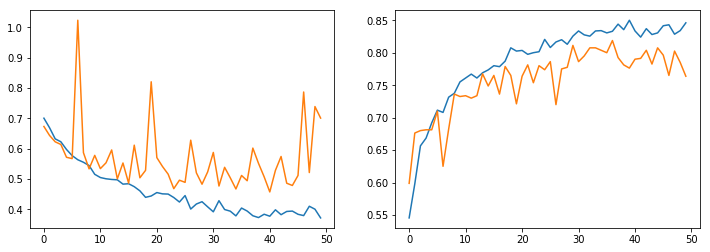

In [14]:
_, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12,4))
ax1.plot(hist.history['loss'])
ax1.plot(hist.history['val_loss'])
ax2.plot(hist.history['acc'])
ax2.plot(hist.history['val_acc'])
plt.show()

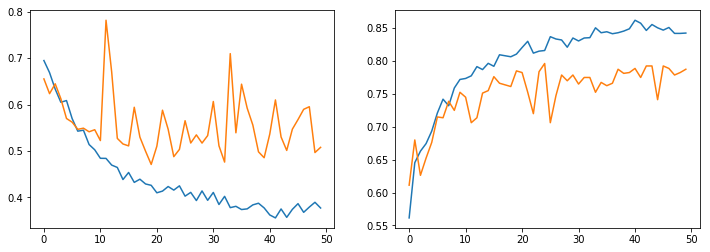

In [40]:
_, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12,4))
ax1.plot(hist.history['loss'])
ax1.plot(hist.history['val_loss'])
ax2.plot(hist.history['acc'])
ax2.plot(hist.history['val_acc'])
plt.show()

# Other CODE

In [13]:
train_datagen = ImageDataGenerator(rescale=1./255)
valid_dataget = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    directory=os.path.join(dataset_location, 'train'),
    target_size=(64, 64),
    batch_size=32,
)

valid_generator = train_datagen.flow_from_directory(
    directory=os.path.join(dataset_location, 'val'),
    target_size=(64, 64),
    batch_size=32,
)


Found 12894 images belonging to 10 classes.
Found 500 images belonging to 10 classes.


In [8]:
aa, bb = train_generator.next()

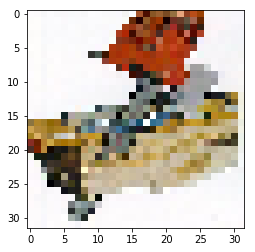

In [9]:
plt.imshow(aa[0])

In [9]:
# X_inputs = tf.keras.layers.Input(shape=(64, 64, 3))

# mobilenetv2 = tf.keras.applications.resnet50.ResNet50(
#     input_shape=(64, 64, 3), include_top=False,
#     weights=None, input_tensor=X_inputs, pooling='avg'
# )

# X = tf.keras.layers.Dense(10, activation='softmax')(mobilenetv2.layers[-1].output)

# model = tf.keras.models.Model(inputs=X_inputs, outputs=X)
# model.compile(optimizer=tf.keras.optimizers.Adam(),
#               loss='categorical_crossentropy',
#               metrics=['accuracy'])

In [20]:
X_inputs = tf.keras.layers.Input(shape=(64, 64, 3))

mobilenetv2 = tf.keras.applications.mobilenet_v2.MobileNetV2(
    input_shape=(64, 64, 3), alpha=.3, include_top=False,
    weights=None, input_tensor=X_inputs, pooling='avg'
)

X = tf.keras.layers.Dense(10, activation='softmax')(mobilenetv2.layers[-1].output)

model = tf.keras.models.Model(inputs=X_inputs, outputs=X)
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [11]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 64, 64, 3)    0                                            
__________________________________________________________________________________________________
Conv1_pad (ZeroPadding2D)       (None, 65, 65, 3)    0           input_2[0][0]                    
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 32, 32, 16)   432         Conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalizationV1) (None, 32, 32, 16)   64          Conv1[0][0]                      
__________________________________________________________________________________________________
Conv1_relu

In [ ]:


# from tensorflow.keras.layers import Input, InputLayer, Conv2D, MaxPooling2D, Activation, Flatten, Dense, Dropout



# X_input = Input(shape=[32, 32, 3])

# X = Conv2D(filters=16, kernel_size=3, padding='same', activation='elu')(X_input)
# X = MaxPooling2D(pool_size=[2,2], strides=[2, 2], padding='same')(X)

# X = Conv2D(filters=32, kernel_size=3, padding='same', activation='elu')(X)
# X = MaxPooling2D(pool_size=[2,2], strides=[2, 2], padding='same')(X)

# X = Conv2D(filters=64, kernel_size=3, padding='same', activation='elu')(X)
# X = MaxPooling2D(pool_size=[2,2], strides=[2, 2], padding='same')(X)

# X = Flatten()(X)
# X = Dropout(0.2)(X)

# X = Dense(512, activation='elu')(X)
# X = Dropout(0.2)(X)

# X = Dense(10, activation='softmax')(X)

# model = tf.keras.Model(inputs=X_input, outputs=X)



# model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
# model.summary()



In [21]:
# THIS SHOULD BE FIT GENERATOR !!!!!
#hist = model.fit(train_generator, epochs=5) #, validation_data=valid_generator)

Epoch 1/5
403/403 [==============================] - 30s 73ms/step - loss: 2.2108 - acc: 0.2113
Epoch 2/5
403/403 [==============================] - 25s 61ms/step - loss: 1.9146 - acc: 0.3291
Epoch 3/5
403/403 [==============================] - 25s 61ms/step - loss: 1.7642 - acc: 0.3971
Epoch 4/5
403/403 [==============================] - 25s 61ms/step - loss: 1.6655 - acc: 0.4354
Epoch 5/5
403/403 [==============================] - 24s 61ms/step - loss: 1.5882 - acc: 0.4711


In [22]:
hist.history.keys()

dict_keys(['loss', 'acc'])

In [19]:
hist.history['val_acc']

[0.1, 0.1, 0.1, 0.1, 0.1]